In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import xgboost as xgb

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.Series(boston.target)

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(boston_data, boston_target, test_size=0.2, shuffle=True)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

In [7]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

In [8]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

In [9]:
num_round = 10000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[0]	eval-rmse:13.42843	train-rmse:12.95626
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 5 rounds.
[1]	eval-rmse:8.44374	train-rmse:7.57064
[2]	eval-rmse:5.94475	train-rmse:5.12436
[3]	eval-rmse:5.25911	train-rmse:4.01249
[4]	eval-rmse:5.04527	train-rmse:3.43196
[5]	eval-rmse:4.87143	train-rmse:3.11325
[6]	eval-rmse:4.79716	train-rmse:2.90702
[7]	eval-rmse:4.70706	train-rmse:2.78126
[8]	eval-rmse:4.47093	train-rmse:2.67637
[9]	eval-rmse:4.38031	train-rmse:2.58469
[10]	eval-rmse:4.33337	train-rmse:2.51386
[11]	eval-rmse:4.34112	train-rmse:2.47269
[12]	eval-rmse:4.35806	train-rmse:2.40046
[13]	eval-rmse:4.33137	train-rmse:2.32763
[14]	eval-rmse:4.32954	train-rmse:2.29855
[15]	eval-rmse:4.36734	train-rmse:2.22021
[16]	eval-rmse:4.36847	train-rmse:2.17784
[17]	eval-rmse:4.38962	train-rmse:2.14356
[18]	eval-rmse:4.32234	train-rmse:2.07628
[19]	eval-rmse:4.33045	train-rmse:2.05315
[20]	eval-rmse:4.32782	t

[190]	eval-rmse:4.02698	train-rmse:0.42738
[191]	eval-rmse:4.02860	train-rmse:0.42400
[192]	eval-rmse:4.03181	train-rmse:0.41852
[193]	eval-rmse:4.03045	train-rmse:0.41620
[194]	eval-rmse:4.02870	train-rmse:0.41225
[195]	eval-rmse:4.02796	train-rmse:0.40965
[196]	eval-rmse:4.02622	train-rmse:0.40738
[197]	eval-rmse:4.03095	train-rmse:0.40458
[198]	eval-rmse:4.03748	train-rmse:0.40235
[199]	eval-rmse:4.03767	train-rmse:0.39987
[200]	eval-rmse:4.03715	train-rmse:0.39884
[201]	eval-rmse:4.03536	train-rmse:0.39508
[202]	eval-rmse:4.03619	train-rmse:0.39267
[203]	eval-rmse:4.03492	train-rmse:0.38850
[204]	eval-rmse:4.03541	train-rmse:0.38502
[205]	eval-rmse:4.03668	train-rmse:0.38278
[206]	eval-rmse:4.03801	train-rmse:0.37944
[207]	eval-rmse:4.03726	train-rmse:0.37808
[208]	eval-rmse:4.03740	train-rmse:0.37744
[209]	eval-rmse:4.04539	train-rmse:0.37544
[210]	eval-rmse:4.04166	train-rmse:0.37287
[211]	eval-rmse:4.04245	train-rmse:0.37177
[212]	eval-rmse:4.04279	train-rmse:0.37027
[213]	eval-

[381]	eval-rmse:4.07678	train-rmse:0.12620
[382]	eval-rmse:4.07794	train-rmse:0.12572
[383]	eval-rmse:4.07789	train-rmse:0.12472
[384]	eval-rmse:4.07795	train-rmse:0.12442
[385]	eval-rmse:4.07779	train-rmse:0.12345
[386]	eval-rmse:4.07791	train-rmse:0.12221
[387]	eval-rmse:4.07917	train-rmse:0.12151
[388]	eval-rmse:4.07942	train-rmse:0.12085
[389]	eval-rmse:4.08007	train-rmse:0.11994
[390]	eval-rmse:4.08166	train-rmse:0.11970
[391]	eval-rmse:4.08115	train-rmse:0.11896
[392]	eval-rmse:4.08130	train-rmse:0.11792
[393]	eval-rmse:4.08239	train-rmse:0.11715
[394]	eval-rmse:4.08245	train-rmse:0.11646
[395]	eval-rmse:4.08266	train-rmse:0.11572
[396]	eval-rmse:4.08265	train-rmse:0.11482
[397]	eval-rmse:4.08388	train-rmse:0.11381
[398]	eval-rmse:4.08320	train-rmse:0.11281
[399]	eval-rmse:4.08493	train-rmse:0.11211
[400]	eval-rmse:4.08564	train-rmse:0.11127
[401]	eval-rmse:4.08494	train-rmse:0.11079
[402]	eval-rmse:4.08528	train-rmse:0.10968
[403]	eval-rmse:4.08462	train-rmse:0.10954
[404]	eval-

[572]	eval-rmse:4.08164	train-rmse:0.04183
[573]	eval-rmse:4.08140	train-rmse:0.04157
[574]	eval-rmse:4.08170	train-rmse:0.04136
[575]	eval-rmse:4.08123	train-rmse:0.04117
[576]	eval-rmse:4.08127	train-rmse:0.04107
[577]	eval-rmse:4.08111	train-rmse:0.04075
[578]	eval-rmse:4.08150	train-rmse:0.04063
[579]	eval-rmse:4.08096	train-rmse:0.04050
[580]	eval-rmse:4.08135	train-rmse:0.04030
[581]	eval-rmse:4.08124	train-rmse:0.04019
[582]	eval-rmse:4.08122	train-rmse:0.03967
[583]	eval-rmse:4.08122	train-rmse:0.03947
[584]	eval-rmse:4.08150	train-rmse:0.03936
[585]	eval-rmse:4.08136	train-rmse:0.03920
[586]	eval-rmse:4.08140	train-rmse:0.03892
[587]	eval-rmse:4.08221	train-rmse:0.03853
[588]	eval-rmse:4.08118	train-rmse:0.03828
[589]	eval-rmse:4.08141	train-rmse:0.03806
[590]	eval-rmse:4.08157	train-rmse:0.03797
[591]	eval-rmse:4.08150	train-rmse:0.03772
[592]	eval-rmse:4.08160	train-rmse:0.03762
[593]	eval-rmse:4.08157	train-rmse:0.03742
[594]	eval-rmse:4.08149	train-rmse:0.03714
[595]	eval-

[763]	eval-rmse:4.08692	train-rmse:0.01374
[764]	eval-rmse:4.08691	train-rmse:0.01363
[765]	eval-rmse:4.08698	train-rmse:0.01354
[766]	eval-rmse:4.08720	train-rmse:0.01351
[767]	eval-rmse:4.08736	train-rmse:0.01348
[768]	eval-rmse:4.08740	train-rmse:0.01339
[769]	eval-rmse:4.08752	train-rmse:0.01331
[770]	eval-rmse:4.08747	train-rmse:0.01323
[771]	eval-rmse:4.08746	train-rmse:0.01315
[772]	eval-rmse:4.08746	train-rmse:0.01310
[773]	eval-rmse:4.08748	train-rmse:0.01307
[774]	eval-rmse:4.08742	train-rmse:0.01294
[775]	eval-rmse:4.08742	train-rmse:0.01290
[776]	eval-rmse:4.08739	train-rmse:0.01287
[777]	eval-rmse:4.08753	train-rmse:0.01280
[778]	eval-rmse:4.08744	train-rmse:0.01269
[779]	eval-rmse:4.08742	train-rmse:0.01262
[780]	eval-rmse:4.08749	train-rmse:0.01254
[781]	eval-rmse:4.08751	train-rmse:0.01239
[782]	eval-rmse:4.08737	train-rmse:0.01235
[783]	eval-rmse:4.08736	train-rmse:0.01226
[784]	eval-rmse:4.08728	train-rmse:0.01225
[785]	eval-rmse:4.08726	train-rmse:0.01221
[786]	eval-

[954]	eval-rmse:4.08776	train-rmse:0.00466
[955]	eval-rmse:4.08776	train-rmse:0.00464
[956]	eval-rmse:4.08776	train-rmse:0.00464
[957]	eval-rmse:4.08777	train-rmse:0.00463
[958]	eval-rmse:4.08776	train-rmse:0.00461
[959]	eval-rmse:4.08776	train-rmse:0.00458
[960]	eval-rmse:4.08778	train-rmse:0.00456
[961]	eval-rmse:4.08772	train-rmse:0.00453
[962]	eval-rmse:4.08775	train-rmse:0.00451
[963]	eval-rmse:4.08776	train-rmse:0.00449
[964]	eval-rmse:4.08775	train-rmse:0.00447
[965]	eval-rmse:4.08773	train-rmse:0.00445
[966]	eval-rmse:4.08773	train-rmse:0.00444
[967]	eval-rmse:4.08772	train-rmse:0.00443
[968]	eval-rmse:4.08772	train-rmse:0.00439
[969]	eval-rmse:4.08771	train-rmse:0.00438
[970]	eval-rmse:4.08770	train-rmse:0.00437
[971]	eval-rmse:4.08770	train-rmse:0.00435
[972]	eval-rmse:4.08771	train-rmse:0.00431
[973]	eval-rmse:4.08773	train-rmse:0.00429
[974]	eval-rmse:4.08774	train-rmse:0.00425
[975]	eval-rmse:4.08774	train-rmse:0.00423
[976]	eval-rmse:4.08771	train-rmse:0.00421
[977]	eval-

[1142]	eval-rmse:4.08800	train-rmse:0.00178
[1143]	eval-rmse:4.08800	train-rmse:0.00177
[1144]	eval-rmse:4.08801	train-rmse:0.00175
[1145]	eval-rmse:4.08801	train-rmse:0.00174
[1146]	eval-rmse:4.08801	train-rmse:0.00173
[1147]	eval-rmse:4.08800	train-rmse:0.00172
[1148]	eval-rmse:4.08800	train-rmse:0.00171
[1149]	eval-rmse:4.08799	train-rmse:0.00170
[1150]	eval-rmse:4.08799	train-rmse:0.00169
[1151]	eval-rmse:4.08800	train-rmse:0.00167
[1152]	eval-rmse:4.08805	train-rmse:0.00166
[1153]	eval-rmse:4.08805	train-rmse:0.00166
[1154]	eval-rmse:4.08805	train-rmse:0.00166
[1155]	eval-rmse:4.08805	train-rmse:0.00166
[1156]	eval-rmse:4.08805	train-rmse:0.00166
[1157]	eval-rmse:4.08805	train-rmse:0.00166
[1158]	eval-rmse:4.08805	train-rmse:0.00166
Stopping. Best iteration:
[1153]	eval-rmse:4.08805	train-rmse:0.00166



In [10]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))

Best Score:0.0017, Iteratin:1153, Ntree_Limit:1154


In [11]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

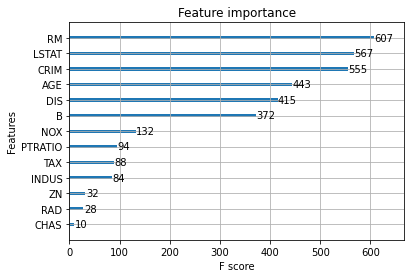

In [12]:
xgb.plot_importance(bst)

In [13]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(test_y, pred)
#mse = mean_absolute_error(test_y, pred)
print('mse:{0:.4f}'.format(mse))

mse:10.3673


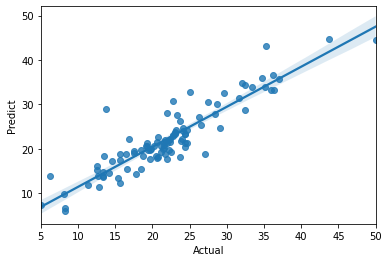

In [14]:
import seaborn as sns

pred_s = pd.Series(pred, index=test_y.index)
y_pred = pd.DataFrame({'Actual': test_y, 'Predict': pred_s})
#y_pred = pd.DataFrame([test_y, pred_s], columns=['Actual', 'Predict'])

sns.regplot(x="Actual", y="Predict", data=y_pred)